## Task 4.1 Hand-designed MLP

Design an MLP that exactly recognizes the blue region bounded by the given line segments. The network should not be learned. Instead, design the weights and biases by hand.  
_Hint_: Setup 4 neurons, one for each separation line, and connect them using further neurons representing AND or OR operations.  
Use the [Heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html) activation function to yield a sharp decision:
\begin{equation*}
    H(x) = \begin{cases} 1 &\quad\text{if $x \geq 0$} \\ 0 &\quad\text{else}\end{cases}
\end{equation*}

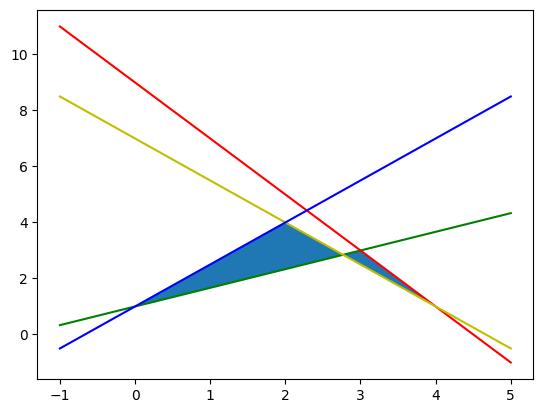

In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
region = np.array([[0,1], [3, 3], [3, 3], [4, 1], [4, 1], [2, 4], [2, 4], [0, 1]])
plt.fill(*region.T)
f1 = lambda x: 2/3*x + 1
f2 = lambda x: -2*x + 9
f3 = lambda x: -3/2*x + 7
f4 = lambda x: 3/2*x + 1
x = np.linspace(-1, 5, 50)
plt.plot(x, f1(x), "g-")
plt.plot(x, f2(x), "r-")
plt.plot(x, f3(x), "y-")
plt.plot(x, f4(x), "b-")
plt.show()

In [ ]:
def heaviside(x):
    return (x >= 0).astype(int)
    

def mlp_forward(x):

  Wih1 = np.array([[2/3, -1], [-2, -1], [-3/2, -1], [3/2, -1]]) # perceptron weights for each seperation line
  b1 = np.array([1, 9, 7, 1])
  h1 = heaviside((Wih1 @ x) + b1)

  Wh1h2 = np.array([[-1, 0, 1, 1], [1, 1, -1, 0]]) # AND layer for each region
  b2 = np.array([-1.5, -1.5])
  h2 = heaviside((Wh1h2 @ h1) + b2)
 
  Wh2o = np.array([1, 1]) # OR layer for output if in any region
  b3 = np.array([-0.5])
  o = heaviside((Wh2o @ h2) + b3)

  return o

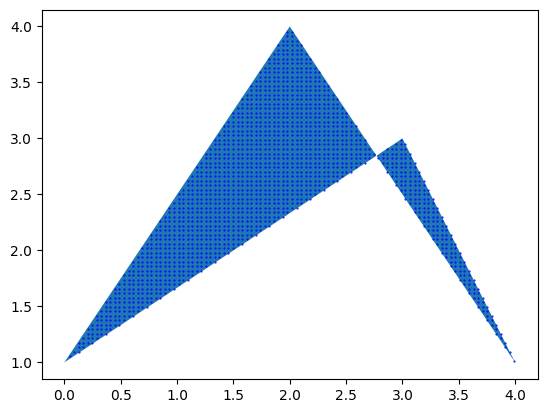

In [ ]:
for x in np.linspace(-1, 5, 150):
    for y in np.linspace(-1, 5, 150):
        output = mlp_forward(np.array([x, y]))
        if output:
            plt.plot(x, y, "bo", markersize=0.5)

region = np.array([[0,1], [3, 3], [3, 3], [4, 1], [4, 1], [2, 4], [2, 4], [0, 1]])
plt.fill(*region.T)
plt.show()

## Task 4.2 Activation Functions

Given the following definitions of the logistic function and tanh:
\begin{align}
  \sigma(x) &= \frac{1}{1 + e^{-x}} \\
  \tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

prove the following identities:
\begin{align}
  \tanh(x) &= 2 \sigma(2x) - 1 \\
  \frac{\partial}{\partial x}\sigma(x) &= \sigma(x) \cdot (1-\sigma(x)) \\
  \frac{\partial}{\partial x}\tanh(x) &= 1 - \tanh^2(x)
\end{align}

SOLUTION:

1. $\tanh(x)= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} +1 -1 = \frac{e^{x}-e^{-x}+e^{x}+e^{-x}}{e^{x}+e^{-x}} -1 = \frac{2e^{x}}{e^{x}+e^{-x}} -1 = \frac{2}{1+e^{-2x}} -1 = 2 \sigma(2x) -1 $
2. $\frac{\partial \sigma(x)}{\partial x} = \frac{\partial }{\partial x}(\frac{1}{1+e^{-x}}) = \frac{(1+e^{-x})(0)-(1)(0-e^{-x})}{(1+e^{-x})^2}=\frac{0+e^{-x}}{(1+e^{-x})^2} = \frac{e^{-x}}{(1+e^{-x})(1+e^{-x})}= \frac{1}{(1+e^{-x})}\left (  \frac{e^{-x}}{1+e^{-x}}\right )= \sigma(x)\left ( \frac{1+e^{-x}-1}{1+e^{-x}} \right )=\sigma(x)\left ( \frac{1+e^{-x}-1}{1+e^{-x}} \right )=\sigma(x)\left (1- \frac{1}{1+e^{-x}} \right )=\sigma(x)\left (1- \sigma(x) \right )$
3. $\frac{\partial \tanh(x))}{\partial x} = \frac{\partial}{\partial x} \left (\frac{e^{x}-e^{-x} }{e^{x}+e^{-x}} \right )=\frac{(e^{x}+e^{-x})(e^{x}+e^{-x})- (e^{x}-e^{-x})(e^{x}-e^{-x})}{(e^{x}+e^{-x})^2}= \frac{(e^{x}+e^{-x})^2}{(e^{x}+e^{-x})^2} - \frac{(e^{x}-e^{-x})^2}{(e^{x}+e^{-x})^2} = 1 - \left (  \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \right )^2 = 1- \tanh^2(x)$

\

## Task 4.3 1d Gaussian

Following the [interactive tutorial from Michael Nielson](http://neuralnetworksanddeeplearning.com/chap4.html), design a single-hidden-layer network to mimic a mixture of two 1d Gaussians and visualize your network's output together with the original function. As our focus isn't a particularly precise approximation, it suffices to use two hidden neurons per Gaussian bump.
Which of the known nonlinearities (Heaviside, logistic, tanh, (leaky) ReLu) is best suited to yield good approximation results?

4/4 [==============================] - 0s 3ms/step


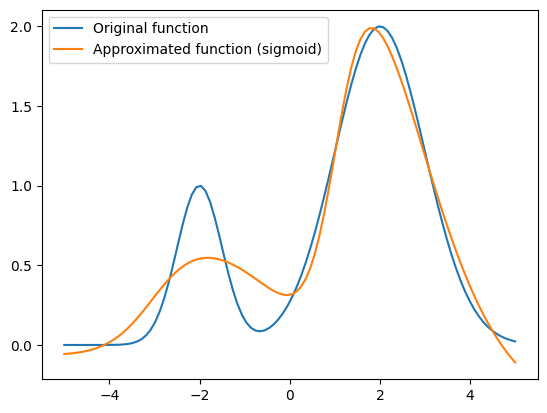

4/4 [==============================] - 0s 3ms/step


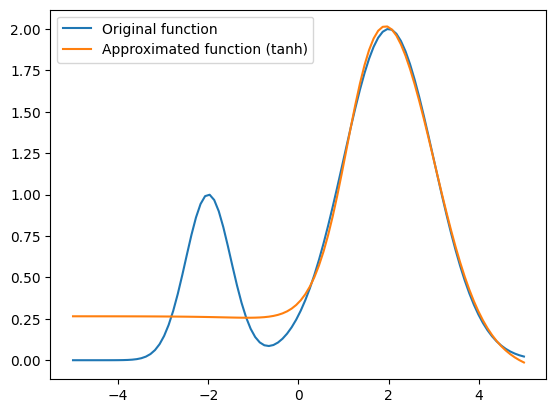

4/4 [==============================] - 0s 3ms/step


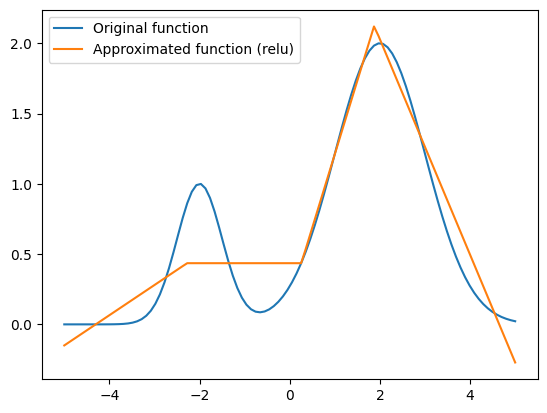

4/4 [==============================] - 0s 3ms/step


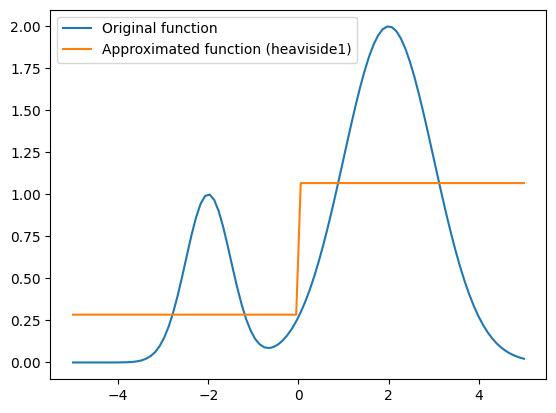

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
def Gaussian(x, mu=0, sigma=1):
    if x.ndim == 1:
        #x = x[:,np.newaxis]
         x = x[:,np.newaxis]  # ensure last dim of x is data dim
    return np.exp(-np.linalg.norm(x-mu, axis=-1)**2 / (2*sigma**2))

#defining heavside function according to the need to make custom activation function. (in previous we needed integer ouput
#and here tf only accept float ouput).
def heaviside1(x):
  return tf.cast(x > 0, dtype=tf.float32)

# Register the custom activation function
tf.keras.utils.get_custom_objects().update({'heaviside1': tf.keras.layers.Activation(heaviside1)})
#defining activation function
activation_functions = ['sigmoid', 'tanh', 'relu', 'heaviside1']

x = np.linspace(-5, 5, 100).reshape(-1,1)
y = Gaussian(x, mu=-2, sigma=0.5) + 2*Gaussian(x, mu=2, sigma=1)

for activation in activation_functions:
  #creating a single hidden layer neural network
  model= Sequential()
  model.add(Dense(4,input_dim=1, activation= activation))
  model.add(Dense(1, activation='linear'))

  #compiling and training the model
  model.compile(loss='mse',optimizer=Adam(learning_rate=0.01))
  model.fit(x,y,epochs=1000, verbose=0)

  #predicting and visualizing the results
  y_pred=model.predict(x).flatten()
  plt.plot(x, y, label='Original function')
  plt.plot(x, y_pred, label=f'Approximated function ({activation})')
  plt.legend()
  plt.show()
  #plt.plot(x, y);

Which of the known nonlinearities (Heaviside, logistic, tanh, (leaky) ReLu) is best suited to yield good approximation results?
As we can observe in above plots, the best suited activation function to yield good approximation results for gaussian mixture in this case will be **tanh** because it gives more smooth and differentiable result allowing it learn more accurately.


## Task 4.4 2d Gaussian

In a similar fashion, design a network to approximate the following 2d Gaussian:

79/79 [==============================] - 0s 1ms/step


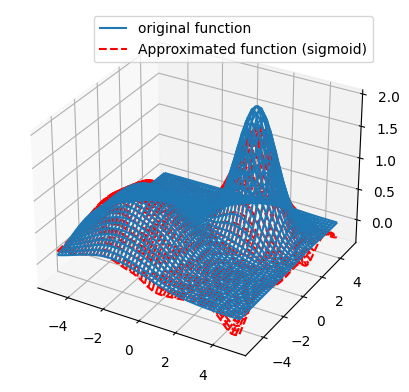

79/79 [==============================] - 0s 1ms/step


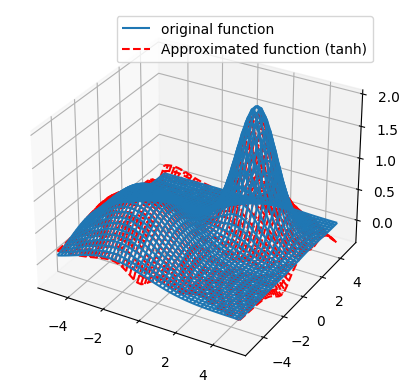

79/79 [==============================] - 0s 1ms/step


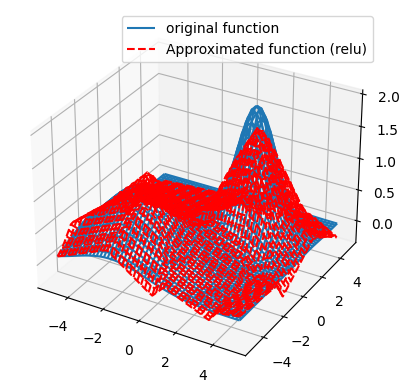

79/79 [==============================] - 0s 1ms/step


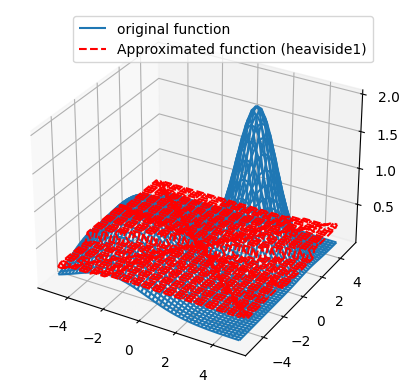

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # enable 3d plotting

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
XY = np.stack(np.meshgrid(x, y), axis=-1)  # create grid of (x,y) pairs
Z = Gaussian(XY, mu=np.array([-2,-2]), sigma=2) + 2*Gaussian(XY, mu=np.array([2,2]))

#creating input and output data
input_data=XY.reshape(-1,2)
output_data=Z.reshape(-1,1)

for activation in activation_functions:
  # Creating a single-hidden-layer neural network
  model = Sequential()
  model.add(Dense(10, input_shape=(2,), activation=activation))
  model.add(Dense(1, activation='linear'))

  #compiling and training data
  model.compile(loss='mse',optimizer=Adam(learning_rate=0.01))
  model.fit(input_data,output_data,epochs=1000, verbose=0)

  #predicting and visualizing data
  Z_pred=model.predict(input_data).reshape(Z.shape)

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.plot_wireframe(XY[:,:,0], XY[:,:,1], Z,label='original function');
  ax.plot_wireframe(XY[:,:,0], XY[:,:,1], Z_pred,label=f'Approximated function ({activation})',color='r',linestyle='dashed')
  plt.legend()
  plt.show();